# **Environment**

## **Import Biblio**

In [445]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# %%
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold,GridSearchCV, RandomizedSearchCV, cross_validate,cross_val_predict,learning_curve
from sklearn.pipeline import make_pipeline
from numpy import interp

# Taking care of missing data
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from tensorflow import keras

# import lib for export model files
import joblib

import chardet
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

rng = np.random.RandomState(0)

import os
for dirname, _, filenames in os.walk('/Etudes\Doctorat\Application\CodeFindrisk'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# **Plot Functions**

## **Pair Plot**

In [449]:
# Pairs plots are just showing all variables paired with all the other variables
def pair_plot(data):
    '''
    This function will create a grid of Axes such that each variable
    in data will by shared in the y-axis across a single row and in the x-axis
    across a single column.The diagonal Axes are treated differently, drawing 
    a plot to show the univariate distribution of the data for the variable in
    that column.
    Parameters :
    Input - data is the pandas type variable for 
    plotting pair plot of features in this
    dataframe 

    Output :
    This function Plot pairwise relationships in a dataset.

    '''
    plt.figure()

    pair_plot = sns.pairplot(data=data,
                             height=3,
                             hue='Outcome',
                             diag_kind='hist')
    # fig.suptitle("Pairplot of all features")
    pair_plot.fig.suptitle("Pairplot of all features")
    plt.show()

    # this function for Gaussian distribution plot
# and box plot simultaneously in a figure


## **Plot Box Guassian**

In [450]:

def Box_Gaussian(data):
    '''
    Parameters :
    Input - data is the pandas type variable

    Output - The Gaussian distribution plot for
    eight feature of input data 

    '''

    from sklearn.preprocessing import StandardScaler

    sc_X = StandardScaler()

    fig = plt.figure(figsize=(15, 6))  # define figure size
    fig.suptitle("Box Gaussian plot of all features")

    n_scaler = StandardScaler()  # standardization function
    temp_Data = n_scaler.fit_transform(data)  # pass into function for standrd.
    for i in range(8):  # loop for all 8 feature

        plt.subplot(2, 4, i+1)  # subplot for 2 rows in 4 columns
        Data = temp_Data[:, i]  # data for every feature
        # kernel density function under red shaded arae
        sns.kdeplot(Data, shade=True, color='red', alpha=0.3)
        # boxplot  with green shaded area
        ax = sns.boxplot(Data, saturation=0.9, color="green")
        # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
        # https://seaborn.pydata.org/generated/seaborn.boxplot.html
        plt.gca().invert_yaxis()  # Reverse Y-Axis in PyPlot
        # plt.title('F'+str(i+1))
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])  # removing xlabel data
        plt.ylim((-0.5, 0.65))  # y axis  limit
        # This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
        plt.tight_layout()
        # https://matplotlib.org/api/tight_layout_api.html
        # plt.grid('on')

        for patch in ax.artists:
            # Get the facecolor of the Axes.
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, 0.3))  # set colour intensity


## **Plot Confusion Matrix**

In [451]:
def plot_confusionMatrix(data):
    '''
    Parameters :
    Input - data is the pandas type variable

    Output -visualization of correalation matrix of
    input data 

    '''
    sns.set(font_scale=1.15)                                    # Set aesthetic parameters in one step.
    # set figure size   https://seaborn.pydata.org/generated/seaborn.set.html
    ax = plt.figure(figsize=(10, 8))
    plt.title("Confusion Matrix of all features")
    sns.heatmap(data.corr(),                                    # input correlation matrix  of dataset
                vmax=1.0,  # Values to anchor the colormap, otherwise they are inferred from
                                                                # the data and other keyword arguments.
                vmin=0.0,
                linewidths=0.01,
                # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                square=False,
                annot=True,  # If True, write the data value in each cell.
                linecolor="black")  # Color of the lines that will divide each cell.
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    # discover the values for bottom and top
    b, t = plt.ylim()
    # Add 0.5 to the bottom
    b += 0.5
    # Subtract 0.5 from the top
    t -= 0.5
    # update the ylim(bottom, top) values
    plt.ylim(b, t)
    plt.show()



## **Plot Distrubiution**

In [452]:
# this function plot univariate distribution of
# every feature
def dist_Plot(data):
    '''
    Parameters :
    Input - data is the pandas type variable

    Output - The distribution plot for
    eight feature of input data 

    '''
    fig, ax = plt.subplots(2, 4, figsize=(
        12, 5))  # set numbers of rows and columns of subplot
    sns.set()
    # Flexibly plot a univariate distribution of observations.
    sns.distplot(data.F1, bins=10, ax=ax[0, 0])
    sns.distplot(data.F2, bins=10, ax=ax[0, 1])
    sns.distplot(data.F3, bins=10, ax=ax[0, 2])
    sns.distplot(data.F4, bins=10, ax=ax[0, 3])
    sns.distplot(data.F5, bins=10, ax=ax[1, 0])
    sns.distplot(data.F6, bins=10, ax=ax[1, 1])
    sns.distplot(data.F7, bins=10, ax=ax[1, 2])
    sns.distplot(data.F8, bins=10, ax=ax[1, 3])
    fig.suptitle("Gaussian Distribution of all features")
    fig.tight_layout()  # This module provides routines to adjust subplot params
    #  so that subplots are nicely fit in the figure.

## **Plot Violin Plot**

In [453]:
# this function plot violin plot  of
# every feature

def plot_violinplot(data):
    '''
    Parameters :
    Input - data is the pandas type variable

    Output - The violinplot plot for
    eight feature of input data 

    '''

    # A violin plot is a method of plotting numeric data.
    # It is similar to box plot with a rotated kernel
    # density plot on each side. Violin plots are similar
    # to box plots, except that they also show the probability
    # density of the data at different values (in the simplest
    # case this could be a histogram).
    fig, ax = plt.subplots(2, 4, figsize=(12, 6))
    # #set numbers of rows and columns of subplot and figure size
    sns.set()
    # violine plot for F1 feature
    sns.violinplot(x=data.Outcome, y=data.F1,  ax=ax[0, 0])
    # violine plot for F2 feature
    sns.violinplot(x=data.Outcome, y=data.F2,  ax=ax[0, 1])
    # violine plot for F3 feature
    sns.violinplot(x=data.Outcome, y=data.F3,  ax=ax[0, 2])
    # violine plot for F4 feature
    sns.violinplot(x=data.Outcome, y=data.F4,  ax=ax[0, 3])
    # violine plot for F5 feature
    sns.violinplot(x=data.Outcome, y=data.F5,  ax=ax[1, 0])
    # violine plot for F6 feature
    sns.violinplot(x=data.Outcome, y=data.F6,  ax=ax[1, 1])
    # violine plot for F7 feature
    sns.violinplot(x=data.Outcome, y=data.F7,  ax=ax[1, 2])
    # violine plot for F8 feature
    sns.violinplot(x=data.Outcome, y=data.F8,  ax=ax[1, 3])
    fig.suptitle("Violin plot of all features")
    fig.tight_layout()

    # https://seaborn.pydata.org/generated/seaborn.violinplot.html
    #
    #




## **Data Plot Functions**

In [454]:
# data plot on different input condition
def data_plot(data,
              Pair_plot,
              Dist_Plot,
              Plot_violinplot,
              Plot_confusionMatrix,
              box_Gaussian):
    '''
    Parameters :
    Input - 
    data - It is the pandas type variable
    Pair_plot - for pair plot visualization of input  data  
    Dist_Plot- for gaussian distribution plot visualization of input  data  
    Plot_violinplot- for violin plot visualization of input  data  
    Plot_confusionMatrix -for confusion matrix visualization of input  data   

    Output - dataframe with outleir rejection
    filled with Input parameter

    '''
    if Pair_plot == True:
        pair_plot(data)

    if Dist_Plot == True:
        dist_Plot(data)

    if Plot_violinplot == True:
        plot_violinplot(data)

    if Plot_confusionMatrix == True:
        plot_confusionMatrix(data)

    if box_Gaussian == True:
        Box_Gaussian(data)

## **Plot Learning Curves**

In [455]:
def plot_learning_curve(
    fig,
    gs,
    estimator,
    title,
    X,
    y,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    mean_fpr=[], tprs=[], aucs=[], TP=[], TN=[], FP=[], FN=[]
):
    
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    '''
    Parameters :
    mean_fpr - Mean False positive rate
    tprs -values of true positive rate
    aucs  - values of auc
    TP    - True positive 
    TN    - True Negative
    FP    - False Positiv
    FN    - False Negative

    Output - 
    Visalization of TPR vs FPR plot
    '''

    ax0 = fig.add_subplot(gs[0, 0])

    ax0.set_title(title)
    ax0.set_xlabel("Training examples")
    ax0.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax0.grid()
    ax0.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax0.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax0.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax0.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax0.legend(loc="best")

    ax1 = fig.add_subplot(gs[0, 1])
    # Plot n_samples vs fit_times
    ax1.grid()
    ax1.plot(train_sizes, fit_times_mean, "o-")
    ax1.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    ax1.set_xlabel("Training examples")
    ax1.set_ylabel("fit_times")
    ax1.set_title("Scalability of the model")

    ax2 = fig.add_subplot(gs[1, 0])
    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    ax2.grid()
    ax2.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    ax2.fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    ax2.set_xlabel("fit_times")
    ax2.set_ylabel("Score")
    ax2.set_title("Performance of the model")

    ax3 = fig.add_subplot(gs[1, 1])
    cf_matrix = confusion_matrix(y_test, estimator.predict(X_test))

    sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax3)
    ax3.set_title('Seaborn Confusion Matrix with labels\n\n')
    # Ticket labels - List must be in alphabetical order
    ax3.xaxis.set_ticklabels(['False', 'True'])
    ax3.yaxis.set_ticklabels(['False', 'True'])

    ax3.set_xlabel('\nPredicted Values')
    ax3.set_ylabel('Actual Values ')
    ax3.set_title("Performance of the model")

    ax4 = fig.add_subplot(gs[2, 0])
    sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
    spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    # mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    ax4.grid()
    # Setting the background color
    # axes[4].set_facecolor("white")

    ax4.spines['bottom'].set_color('#000000')
    ax4.spines['top'].set_color('#000000')
    ax4.spines['right'].set_color('#000000')
    ax4.spines['left'].set_color('#000000')

    ax4.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Avg. ROC (AUC (avg $\pm$ std) = %0.3f $\pm$ %0.3f)' % (
                 mean_auc, std_auc),
             lw=2, alpha=.8)

    ax4.scatter((1-spe), sen, s=80, c='r', marker='x',)
    ax4.scatter(0, sen, s=80, c='r', marker='x',)
    ax4.scatter((1-spe), 0, s=80, c='r', marker='x',)
    ax4.axhline(y=sen, color='r', linestyle='--')
    ax4.axvline(x=(1-spe), color='r', linestyle='--')
    ax4.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
    ax4.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax4.fill_between(mean_fpr, tprs_lower, tprs_upper, color='darkgray', alpha=0.5,
                     label=r'$\pm$ 1 Standard deviation')

    ax4.set_xlabel('False Positive Rate (FPR)')
    ax4.set_ylabel('True Positive Rate (TPR)')
    ax4.legend(loc="lower right")

    from sklearn.metrics import PrecisionRecallDisplay
    ax5 = fig.add_subplot(gs[2, 1])
    ax5.grid()
    PrecisionRecallDisplay.from_estimator(
        estimator, X_test, y_test, name=title ).plot(ax=ax5)
    
#     ax6 = fig.add_subplot(gs[3,:])
#     from sklearn.model_selection import validation_curve
#     param_range = np.logspace(-6, -1, 5)
#     train_scores, test_scores = validation_curve(
#     estimator,
#     X,
#     y,
#     param_name="",
#     param_range=param_range,
#     scoring="roc_auc",
#     n_jobs=2,
# )
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     ax6.title("Validation Curve with SVM")
#     ax6.xlabel(r"$\gamma$")
#     ax6.ylabel("Score")
#     ax6.ylim(0.0, 1.1)
#     lw = 2
#     ax6.semilogx(
#         param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
#     )
#     ax6.fill_between(
#         param_range,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.2,
#         color="darkorange",
#         lw=lw,
#     )
#     ax6.semilogx(
#         param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
#     )
#     ax6.fill_between(
#         param_range,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.2,
#         color="navy",
#         lw=lw,
#     )
#     ax6.legend(loc="best")
#     ax6.show()
        
    return plt

# **Function Hyperparameter Tuning**

## **Tuning params Function**

In [ ]:
def TunedParams(model, model_name, npX, npy, cv):

    clf = GridSearchCV(model,
                       tuned_parameters[model_name
                                        .replace(
                           'Classifier', '')
                                        ],
                    #  tuned_parameters[model.steps[3][0]],
                       cv=cv,
                       scoring=(
                           'accuracy',
                           'f1',
                           'roc_auc',
                           'precision',
                           'recall',
                        #    'neg_log_loss',
                        #    'neg_mean_squared_error'
                       ),
                       refit='roc_auc',
                       # n_iter=10,
                       n_jobs=-1)
    
    clf.fit(npX, npy)

    print('Best score and parameter combination for {}= '.format(model_name))

    print(clf.best_score_)    
    print(clf.best_params_)    
    #report(results=clf, n_top=1)

## **Metrics Function**

In [ ]:
n_dots = 50
tprs = []
mean_fpr = np.linspace(0, 1, 100)

def metrics(model_name, y_true, y_pred, probas_):
    '''
    Parameters :
    Input - 
    y_true - true  value of input data    
    y_pred- predicted  value of input data  
    probas_- probability/confidence of predicted output

    return -True Negative(tn),False Positive(fp),False Negative(fn)
    True positive(tp),AUC(roc_auc),False Positive Rate(fpr),
    True positive rate(tpr)

    '''
    
    points = n_dots*'-'
    #print(points)
    #print(model_name)
    #print(points)
    #report(results)
#    print("Best parameters set found on development set:")
#    print(clf.best_params_)
    fpr, tpr, thresholds = roc_curve(y_true, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #aucs.append(roc_auc)
    print("Detailed classification report for {}".format(model_name))
    print()
    print(classification_report(y_true, y_pred))
    print()
    print("Area Under ROC (AUC): {}".format(roc_auc))
    print()
    print("the cohen kappa : {}".format(cohen_kappa_score(y_true, y_pred)))
    print()
    print('Confusion Matrix for current fold: ')
    print(confusion_matrix(y_true, y_pred))
    print()
    print("Accuracy: {}".format(accuracy_score(y_true, y_pred)))
    print()
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return tn, fp, fn, tp, roc_auc, fpr, tpr

## **Report Function**

In [ ]:
 # Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")
            print(results.best_params_)
            print(results.best_score_)


# **Preprocessing Functions**


In [456]:
Renamed_feature = []  # list of names that will rename to feature column
all_clf_res = []  # every classifier auc values are stored in it
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn import svm

def iforest(data,col,target):
    n_samples = 300
    outliers_fraction = 0.08
    n_outliers = int(outliers_fraction * n_samples)
    n_inliers = n_samples - n_outliers

    # define outlier/anomaly detection methods to be compared.
    # the SGDOneClassSVM must be used in a pipeline with a kernel approximation
    # to give similar results to the OneClassSVM
    anomaly_algorithms = [
        ("Empirical Covariance", EllipticEnvelope(support_fraction=1.0, contamination=0.25)),
        ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
        ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
        ("One-Class SVM (SGD)",make_pipeline(
                Nystroem(gamma=0.1, random_state=42, n_components=150),
                SGDOneClassSVM(
                    nu=outliers_fraction,
                    shuffle=True,
                    fit_intercept=True,
                    random_state=42,
                    tol=1e-6,
                ),
            ),
        ),
        (
            "Isolation Forest",
            IsolationForest(contamination=outliers_fraction,max_features=0.2 ,random_state=rng),
        ),
        (
            "Local Outlier Factor",
            LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
        ),
    ]

    #model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0,random_state=rng)
    
    model = anomaly_algorithms[4][1]
    print(model)
    df = data
    
    for i in col:
        
        #mean_by_target = data.loc[data[i] != 0, [i, target]].groupby(target).mean()   
       
        model.fit(df[[i]])
        
        #df['scores'+[i]] = model.decision_function(df[[i]])
        
        df['anomaly'+i] = model.predict(df[[i]])
        
        #score = model.predict(data[Renamed_feature[i]])
        
        anomaly = df.loc[df['anomaly'+i]==-1]
        anomaly_index = list(anomaly.index)
        
        # for ano_index in anomaly_index:
        #     print(ano_index)
        #     print(df[[target]]==0)
        #     print(df.loc[(ano_index)&(df[[target]] == 0),i])
        #     #df.loc[(ano_index)&(df[[target]] == 0), i] = mean_by_target.iloc[0][0]
        #     #df.loc[(ano_index)&(df[[target]] == 1), i] = mean_by_target.iloc[1][0]
            
      
        
        
        
        df = df.drop(anomaly_index)
        
      
         
        #data = df.drop(['scores'+Renamed_feature[i]], axis=1)    
        df = df.drop(['anomaly'+i], axis=1)    
    
    data = df 
        
    return data     




In [457]:
def IQR(data):
    '''
    Parameters :
    Input - data is the pandas type variable

    Return - dataframe with outleir rejection
    of input data 

    '''
    # input dataset as data
    # for every feature
    for i in range(data.shape[1]-1):
        Q1 = data[Renamed_feature[i]].quantile(0.25)
        Q3 = data[Renamed_feature[i]].quantile(0.75)
        IQR = Q3-Q1  # find IQR
        LW = (Q1 - 1.5 * IQR)  # find lower boundary
        # print(LW)
        UW = (Q3 + 1.5 * IQR)  # find upper boundary
        # print(UW)
        # drop greater than upper limit
        data = data[data[Renamed_feature[i]] < UW]
        # drop smaller than lower limit
        data = data[data[Renamed_feature[i]] > LW]

    return data

def outlier_Rejection(data, iqr):
    '''
    Parameters :
    Input - 
    data is the pandas type variable
    iqr- for drop the outleir 
    Return - dataframe with outleir rejection
    filled with Input parameter
    '''
    
    # outlier_Rejection with conditional input
    if iqr == True:  # reject outleir in IQR range
        data = IQR(data)
     # 
    return data

In [458]:
def replace_zero(data, field, target):
    mean_by_target = data.loc[data[field] != 0, [field, target]].groupby(target).mean()
    data.loc[(data[field] == 0)&(data[target] == 0), field] = mean_by_target.iloc[0][0]
    data.loc[(data[field] == 0)&(data[target] == 1), field] = mean_by_target.iloc[1][0]
    

In [459]:
def  TopF(model,TOP_FEATURES = 8,X_train=[]):
    topF=[]
    if hasattr(model, 'feature_importances_'):
        
        importances = model.feature_importances_
        #std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
        indices = np.argsort(importances)[::-1]
        indices = indices[:TOP_FEATURES]

        #print('Top features:')

        for f in range(TOP_FEATURES):
            d = [X_train.columns[indices[f]], importances[indices[f]]]
            topF.append(d)
            #print('%d. %s (%f)' % (f + 1,X_train.columns[indices[f]], importances[indices[f]]))
            
    return topF

In [460]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

# Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import KBinsDiscretizer 

# Scaler Variable
sc_X = StandardScaler()
mms_X = MinMaxScaler()
rs_X = RobustScaler()
#sc_X = sc_X.fit(npX)

# Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix


#from boruta import BorutaPy

import matplotlib.gridspec as gridspec


# npX = np.array(X_train).copy()
# npy = np.array(y_train).copy()


pca = PCA(n_components=2)
fs = SelectKBest(score_func=f_classif, k='All')
anova = SelectPercentile(f_classif)


#import prince
#rfe = RFE(estimator=clf_rf, n_features_to_select=TOP_FEATURES, step=1)
#forest = RandomForestClassifier(n_jobs=-1,class_weight='balanced', max_depth=5)
#Bor = BorutaPy(forest, n_estimators='auto', verbose=2)
# Bor.fit(npX.values, npy.values)
# npX = Bor.transform(npX.values)

# **Load The data**


In [461]:

#Pima Indian
with open("Data/diabetes.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

train = pd.read_csv("Data/diabetes.csv", encoding='ISO-8859-1')

#diabetes 700000
# with open("Data/diabetes_binary_5050.csv", 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

# train = pd.read_csv("Data/diabetes_binary_5050.csv", encoding='ISO-8859-1')


# #Findrisk MyData
# with open("Data/MydataFindriskNonOui.csv", 'rb') as rawdata:
#     result = chardet.detect(rawdata.read(100000))
# result

# train = pd.read_csv("Data/MydataFindriskNonOui.csv", encoding='UTF8')

# **Explore the data**


In [462]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [463]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [464]:
# importing plotly and cufflinks in offline mode
# import cufflinks as cf
# import plotly.offline
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)
# train.iplot()
# import dtale
# d = dtale.show(train)
# d

C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

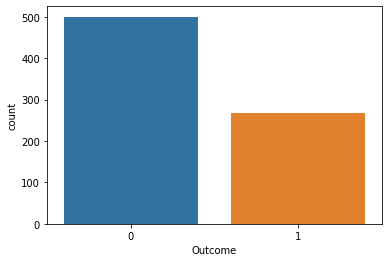

In [465]:
sns.countplot(train['Outcome'])

# **Preprocessing**

In [466]:
X = train.drop([
    #'Score',
    'Outcome'], axis=1)

y = train['Outcome']
X.shape

(768, 8)

## **Rename Features**


In [467]:
Renamed_feature = []  # list of names that will rename to feature column
for i in range(X.shape[1]):
    # for renaming dataset of columns features F1 -- F8
    Renamed_feature.append("F"+str(i+1))

Renamed_feature.append('Outcome')    
# this function  is for manual outleir rejection

data = pd.DataFrame(columns=Renamed_feature)
data 

# rows = []

for i in range(X.shape[1]):
    this_column = data.columns[i]
    values = X.iloc[:, :X.shape[1]].values[:, i]
    data[this_column]= values
   
#     #print(values)
#     zipped = zip(['F'+str(i+1)], values)
#     #print(zipped)
#     a_dictionary = dict(zipped)
#     #print(a_dictionary)
#     rows.append(values)

this_column = data.columns[X.shape[1]]
data[this_column]= y
# # zipped = zip(['Outcome'], values)
# # a_dictionary = dict(zipped)
# #print(a_dictionary)
# rows.append([y.values])

# print(len(Renamed_feature))

#print(rows)
# # # data = pd.DataFrame({
# # #                         'Outcome': y
# # #                     })

#data = pd.DataFrame(rows,columns=Renamed_feature)
# # #data.columns = Renamed_feature
data


,F1,F2,F3,F4,F5,F6,F7,F8,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


data = pd.DataFrame({'F1': X.iloc[:, :10].values[:, 0],
                     'F2': X.iloc[:, :10].values[:, 1],
                     'F3': X.iloc[:, :10].values[:, 2],
                     'F4': X.iloc[:, :10].values[:, 3],
                     'F5': X.iloc[:, :10].values[:, 4],
                     'F6': X.iloc[:, :10].values[:, 5],
                     'F7': X.iloc[:, :10].values[:, 6],
                     'F8': X.iloc[:, :10].values[:, 7],
                     #'F9':X.iloc[:,:10].values[:,8],
                     #'F10':X.iloc[:,:10].values[:,9],
                     'Outcome': y})
data.head()


In [468]:
# o = [0, 1]

# fig, ax = plt.subplots(1, 1, figsize=(
#         12, 5))  # set numbers of rows and columns of subplot
# sns.set()

# for outcome in o:
#     subset = data[data['Outcome'] == outcome]
    
#     sns.distplot(subset['F3'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = outcome)
    
   

# fig.suptitle("All")
# fig.tight_layout()   

In [469]:
All = ["F1","F2","F3","F4","F5","F6","F7","F8"]
OutRej= ["F2","F4","F5","F6","F7","F8"]
ReZero = ["F2","F3","F4","F5","F6","F7","F8"]

## **one-hot-encoder**

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
columns_to_one_hot = All
encoded_array = enc.fit_transform(data.loc[:,columns_to_one_hot])
columns_name = enc.get_feature_names_out()
df_encoded = pd.DataFrame(encoded_array,columns=columns_name )
data = pd.concat([data,df_encoded],axis=1)
data.drop(labels= columns_to_one_hot,axis=1,inplace=True)
data


## **Label Encoding**

#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in range(data.shape[1]-1):
    data["F"+str(i+1)] = labelencoder.fit_transform(data[["F"+str(i+1)]])
    #data[columns_name[i]] = labelencoder.fit_transform(data[columns_name[i]])
data["Outcome"] = labelencoder.fit_transform(data[["Outcome"]])
data 

## **Outlier Rejection**


In [470]:
print('Shape Before Process: ' + str(data.shape))

#data = outlier_Rejection(data,iqr=True)
data = iforest(data,OutRej,'Outcome')

print('Shape After outlier Removed: ' + str(data.shape))


Shape Before Process: (768, 9)
IsolationForest(contamination=0.08, max_features=0.2,
                random_state=RandomState(MT19937) at 0x27240EE9598)


C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0

Shape After outlier Removed: (469, 9)


C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


## **Replace Zero**

In [471]:
for col in ReZero:   
    replace_zero(data, col, 'Outcome')              
print('Shape After Filling Missing Value: ' + str(data.shape))

Shape After Filling Missing Value: (469, 9)


## **Correlation Figure**


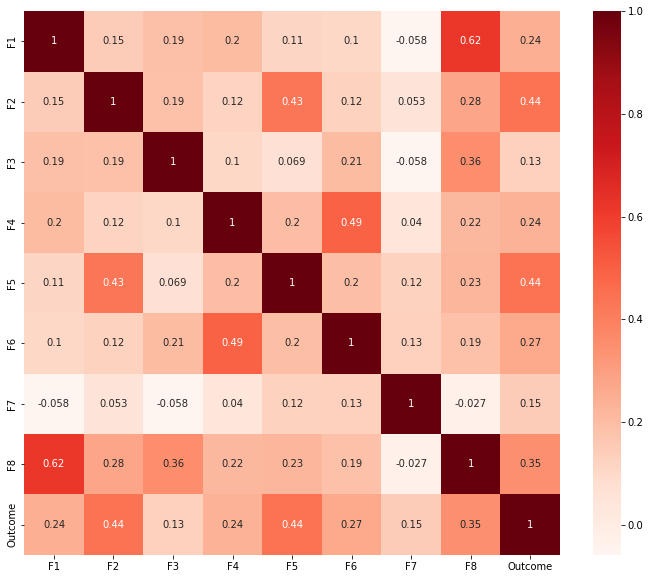

In [472]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



## **Correlation feature selection**

In [473]:
#Correlation with output variable
cor_target = abs(cor['Outcome'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.2]
print(relevant_features.index)
Accepted = []
for i in relevant_features.index: 
        Accepted.append(i)
Accepted.append('Outcome')        
print(Accepted)

Index(['F3', 'F7'], dtype='object')
['F3', 'F7', 'Outcome']


## **Impute Missing Data**


In [474]:

estimators = [
    BayesianRidge(),
    RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=rng,
    ),
    KNeighborsRegressor(n_neighbors=15),
]
imputer= SimpleImputer(strategy='mean')
#imputer = IterativeImputer(random_state=rng, estimator=estimators[0], max_iter=25)

# imputer = imputer.fit_transform(data[["F1",
#                             "F2",
#                             "F3",
#                             "F4",
#                             "F5",
#                             "F6",
#                             "F7",
#                             "F8",
#                             #"F9",
#                             "Outcome"]])



In [475]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   F1       469 non-null    float64
 1   F2       469 non-null    float64
 2   F3       469 non-null    float64
 3   F4       469 non-null    float64
 4   F5       469 non-null    float64
 5   F6       469 non-null    float64
 6   F7       469 non-null    float64
 7   F8       469 non-null    float64
 8   Outcome  469 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 36.6 KB


# **NEW X and Y**

In [476]:
X = data.drop(Accepted, axis=1)
y = data['Outcome']
X

,F1,F2,F4,F5,F6,F8
0,6.0,148.0,35.000000,139.983333,33.6,50.0
1,1.0,85.0,29.000000,106.834356,26.6,31.0
3,1.0,89.0,23.000000,94.000000,28.1,21.0
5,5.0,116.0,26.903084,106.834356,25.6,30.0
6,3.0,78.0,32.000000,88.000000,31.0,26.0
...,...,...,...,...,...,...
762,9.0,89.0,26.903084,106.834356,22.5,33.0
764,2.0,122.0,27.000000,106.834356,36.8,27.0
765,5.0,121.0,23.000000,112.000000,26.2,30.0
766,1.0,126.0,30.227273,139.983333,30.1,47.0


# **tunning parametre for preprocessing**

In [477]:

# from sklearn.metrics import precision_score, recall_score
# from sklearn.model_selection import GridSearchCV

# def outlier_precision(mod, X, y):
#     preds = mod.predict(X)
#     return precision_score(y, np.where(preds == 1, 0, 1))

# def outlier_recall(mod, X, y):
#     preds = mod.predict(X)
#     return recall_score(y, np.where(preds == 1, 0, 1))

# forest = IsolationForest(contamination=0.1, max_features=0.4)

# mod = GridSearchCV(estimator=forest, 
#                    cv=5,
#                    n_jobs=-1,
#                   scoring=(
                            
#                             'precision',
#                             'recall',
                       
#                         ),
#                         refit='recall',
#                    param_grid={'contamination': np.linspace(0.0001, 0.5, 30),
#                                'max_features':np.linspace(0.1, 1, 10),
#                                })

# mod.fit(X, y)
# print("Best features : ")
# print(mod.best_estimator_)
# print("Score : ")
# print(mod.best_score_) 

# **Smote Sampling**


In [478]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek 
from sklearn.preprocessing import QuantileTransformer, quantile_transform

smote = SMOTE(random_state=rng)
ada = ADASYN(random_state=rng)
sampler = SMOTEN(random_state=rng)
sm = KMeansSMOTE(random_state=rng)
ros = RandomOverSampler(random_state=rng)
smt = SMOTETomek(random_state=rng)

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

#X_sm, y_sm = smt.fit_resample(X, y)

# X_sm, y_sm = under.fit_resample(X_sm, y_sm)

X_sm, y_sm = X , y

<AxesSubplot:title={'center':'Count (Class)'}>

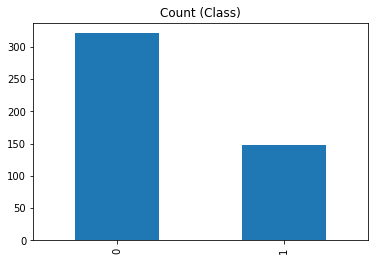

In [479]:
y_sm.value_counts().plot(kind='bar', title='Count (Class)')


# **Split Data**


In [480]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,random_state=rng)
X_train


,F1,F2,F4,F5,F6,F8
369,1.0,133.0,28.000000,140.000000,32.8,45.0
164,0.0,131.0,30.227273,139.983333,31.6,32.0
544,1.0,88.0,29.000000,76.000000,32.0,29.0
348,3.0,99.0,19.000000,74.000000,21.8,26.0
714,3.0,102.0,26.903084,106.834356,29.5,32.0
...,...,...,...,...,...,...
240,1.0,91.0,24.000000,106.834356,29.2,21.0
554,1.0,84.0,23.000000,115.000000,36.9,28.0
14,5.0,166.0,19.000000,175.000000,25.8,51.0
266,0.0,138.0,30.227273,139.983333,36.3,25.0


# **Plot the data**

In [481]:
# data_plot(data,
#           Pair_plot=True,
#           Dist_Plot=True,
#           Plot_violinplot=True,
#           Plot_confusionMatrix=True,
#           box_Gaussian=False)
# from autoviz.AutoViz_Class import AutoViz_Class

# AV = AutoViz_Class()
# sep = ','
# dft = AV.AutoViz(filename="",sep=sep, depVar='Outcome', dfte=data, header=0, verbose=2, 
#                  lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)






## **Models**

In [482]:
import tpot
from tpot import TPOTClassifier

#import classifiers
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.covariance import OAS
from sklearn.neural_network import MLPClassifier

from scikeras.wrappers import KerasClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

clf_Gb = GaussianNB()

clf_knn = KNeighborsClassifier(
    algorithm="brute", metric="manhattan", n_neighbors=49, p=1, weights="uniform")

clf_rf = RandomForestClassifier( bootstrap=True, criterion="gini", max_features=0.8, min_samples_leaf=8, min_samples_split=4, n_estimators=100,
    #criterion="entropy", n_estimators=1000, max_features="log2", 
    random_state=rng)

#clf_et = ExtraTreesClassifier(criterion="gini", n_estimators=100, random_state=rng)
clf_et= ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_features=0.6000000000000001, min_samples_leaf=2, min_samples_split=7, n_estimators=100,random_state=rng)

clf_bc = BaggingClassifier(random_state=rng)

clf_ab = AdaBoostClassifier(algorithm="SAMME.R", n_estimators=200, learning_rate=0.1, random_state=rng)

clf_dt = DecisionTreeClassifier(criterion="entropy", min_samples_split=0.2,
                                min_samples_leaf=3, splitter="best", random_state=rng)



#clf_xg = XGBClassifier(min_child_weight=5,gamma=2,subsample=1.0,colsample_bytree=0.8, max_depth=3, use_label_encoder=False, random_state=rng)

clf_xg = XGBClassifier(learning_rate=0.01, max_depth=10, min_child_weight=2, n_estimators=100, n_jobs=1,use_label_encoder=False, subsample=0.5, verbosity=0,random_state=rng)

clf_lr = LogisticRegression(random_state=rng)

clf_svm = SVC(C=10,kernel='rbf', probability=True, random_state=rng)

clf_GBC = GradientBoostingClassifier(learning_rate=0.1, max_depth=9, max_features=0.8, min_samples_leaf=7, min_samples_split=16, n_estimators=100, subsample=0.6000000000000001)
oa = OAS(store_precision=False, assume_centered=False)

clf_lda = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa)

clf_MLP = MLPClassifier(solver='adam', alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=rng, max_iter=5000)

clf_QDA = QuadraticDiscriminantAnalysis()
#clf_SGD = SGDClassifier(random_state=rng)
# clf_pa = PassiveAggressiveClassifier())

clf_GPC = GaussianProcessClassifier(1.0 * RBF(1.0))

clf_ridg = RidgeClassifier()

def get_model(hidden_layer_dim, meta):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    n_classes_ = meta["n_classes_"]

    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_features_in_, input_shape=X_shape_[1:]))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(hidden_layer_dim))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(n_classes_))
    model.add(keras.layers.Activation("softmax"))
    # Compiling ANN
    model.compile(optimizer="adam", loss="binary_crossentropy")
    return model


clf_ANN = KerasClassifier(
    get_model,
    loss="binary_crossentropy",
    hidden_layer_dim=100,
)

n_neighbors = range(1, 50, 2)
leaf_size = range(5, 50, 5)

Distance = [1, 2]

var_smoothing = [1e-01,
                 1e-02,
                 1e-03,
                 1e-04,
                 1e-05,
                 1e-06,
                 1e-07,
                 1e-08,
                 1e-09,
                 1e-10,
                 1e-11,
                 1e-12]


tuned_parameters = {"GaussianNB": [
    {'var_smoothing': var_smoothing}
],

    "KNeighbors": [
        {'n_neighbors': n_neighbors,  # define parameters with different algorithm
         'algorithm': ['brute'],
         'p':Distance,
         'weights':['uniform', 'distance'],
         'metric':['euclidean', 'manhattan', 'minkowski']
         },

    {'n_neighbors': n_neighbors,
            'algorithm': ['ball_tree'],
            'leaf_size': leaf_size,
            'p':Distance,
            'weights':['uniform', 'distance'],
            'metric':['euclidean', 'manhattan', 'minkowski']},

    {'n_neighbors': n_neighbors,
            'algorithm': ['kd_tree'],
            'leaf_size': leaf_size,
            'p':Distance,
            'weights':['uniform', 'distance'],
            'metric':['euclidean', 'manhattan', 'minkowski']}
],
    "RandomForest": [
        {'criterion': ['gini', 'entropy'],
         'n_estimators':[10, 100, 1000],
         'max_features':['sqrt', 'log2']}
],
    "ExtraTrees": [
        {'criterion': ['gini', 'entropy']}
],
    "Bagging": [
        {

        }
],
    "AdaBoost": [
        {'algorithm': ['SAMME', 'SAMME.R'],
         'learning_rate':[0.1, 0.5, 1.0],
         'n_estimators': [10, 50, 100, 200]}
],
    "DecisionTree": [
        {'criterion': ['gini', 'entropy'],
         'splitter': ['best'],
         'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'min_samples_leaf': [1, 2, 3, 4, 5]}
],
    "XGB": [
        {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.5, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
        }
],
    "LogisticRegression": [
        {
            'solvers': ['newton-cg', 'lbfgs', 'liblinear'],
        }
],
    "SVC": [
        {'kernel': ['poly', 'rbf', 'sigmoid'],
         'C': [50, 10, 1.0, 0.1, 0.01]
         }
],
    "MLP": [
    {
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'hidden_layer_sizes': [
            (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,
                                                                          ), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,)
        ]
    }
],
    "LinearDiscriminantAnalysis": [
        {
            'solver': ['svd', 'lsqr', 'eigen']
        }
],
    "QDA": [
        {
            'reg_param': [0.00001, 0.0001, 0.001, 0.01, 0.1],
            'store_covariance': [True, False],
            'tol': [0.0001, 0.001, 0.01, 0.1],
        }
],
    "Ridge": [
        {
            'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        }
],
    "GBC": [
        {
            'n_estimators ': [10, 100, 1000],
            'learning_rate ': [0.001, 0.01, 0.1],
            'subsample  ': [0.5, 0.7, 1.0],
            'max_depth  ': [3, 7, 9],
        }
],
}

Classifiers = ['GaussianNB',
               'KNeighbors',
               'RandomForest',
               'ExtraTrees',
               'Bagging',
               'AdaBoost',
               'DecisionTree',
               'XGB',
               'LogisticRegression',
               'SVC',
               # 'PassiveAggresive',
               'MLP',
               'LinearDiscriminantAnalysis',
               "QDA",
               # "ANN"
               # "SGD"
               #"Gaussian Process",
               "GBC",
              # "Ridge"
               "Stacked"
               ]

scores = []
results = []

#space = dict()
models = [
    clf_Gb,
    clf_knn,
    clf_rf,
    clf_et,
    clf_bc,
    clf_ab,
    clf_dt,
    clf_xg,
    clf_lr,
    clf_svm,
    # clf_pa,
    clf_lda,
    clf_MLP,
    clf_QDA,
    #clf_GPC,
    # clf_ANN
    # clf_SGD
    clf_GBC,
    #clf_ridg
]

# for store the value of accuracy
Accuracy = []
# for store False Positive
FP = []
# for True Negative
TN = []
# for False Negative
FN = []
# for True Positive
TP = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=rng)


# **Tuning parameters**

In [483]:
from sklearn.model_selection import RepeatedStratifiedKFold
npX = X_train
npy = y_train
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=rng)

combined_features = FeatureUnion([("pca", pca), ("univ_select", fs)])

param_grid = dict(
    features__pca__n_components=[1, 2, 3,4,5,6,7,8],
    features__univ_select__k=[1, 2,3,4,5,6,7,8],
)

for model in models:
    model_name = type(model).__name__
    # pipeline = Pipeline([("features", combined_features), ("Classifer", model)])
    
    # grid_search = GridSearchCV(pipeline, param_grid=param_grid ,verbose=5, scoring=(
    #                        'accuracy',
    #                        'f1',
    #                        'roc_auc',
    #                        'precision',
    #                        'recall',
    #                     #    'neg_log_loss',
    #                     #    'neg_mean_squared_error'
    #                    ),
    #                    refit='roc_auc',cv=cv,n_jobs=-1)
    # grid_search.fit(X, y)
    
    # print(model_name)
    # print("Best features : ")
    # print(grid_search.best_estimator_)
    # print("Score : ")
    # print(grid_search.best_score_)   
    
    #print(model.get_params().keys())
    
    #TunedParams(model, model_name, npX=npX, npy=npy, cv=cv)

In [484]:
clf_tpot = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='roc_auc', verbosity=2, random_state=42, n_jobs=-1)
#clf_tpot.fit(npX, npy)

# **Train The Data**

Detailed classification report for GaussianNB

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        78
           1       0.64      0.85      0.73        40

    accuracy                           0.79       118
   macro avg       0.77      0.80      0.78       118
weighted avg       0.82      0.79      0.79       118


Area Under ROC (AUC): 0.8862179487179487

the cohen kappa : 0.561924561924562

Confusion Matrix for current fold: 
[[59 19]
 [ 6 34]]

Accuracy: 0.788135593220339



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


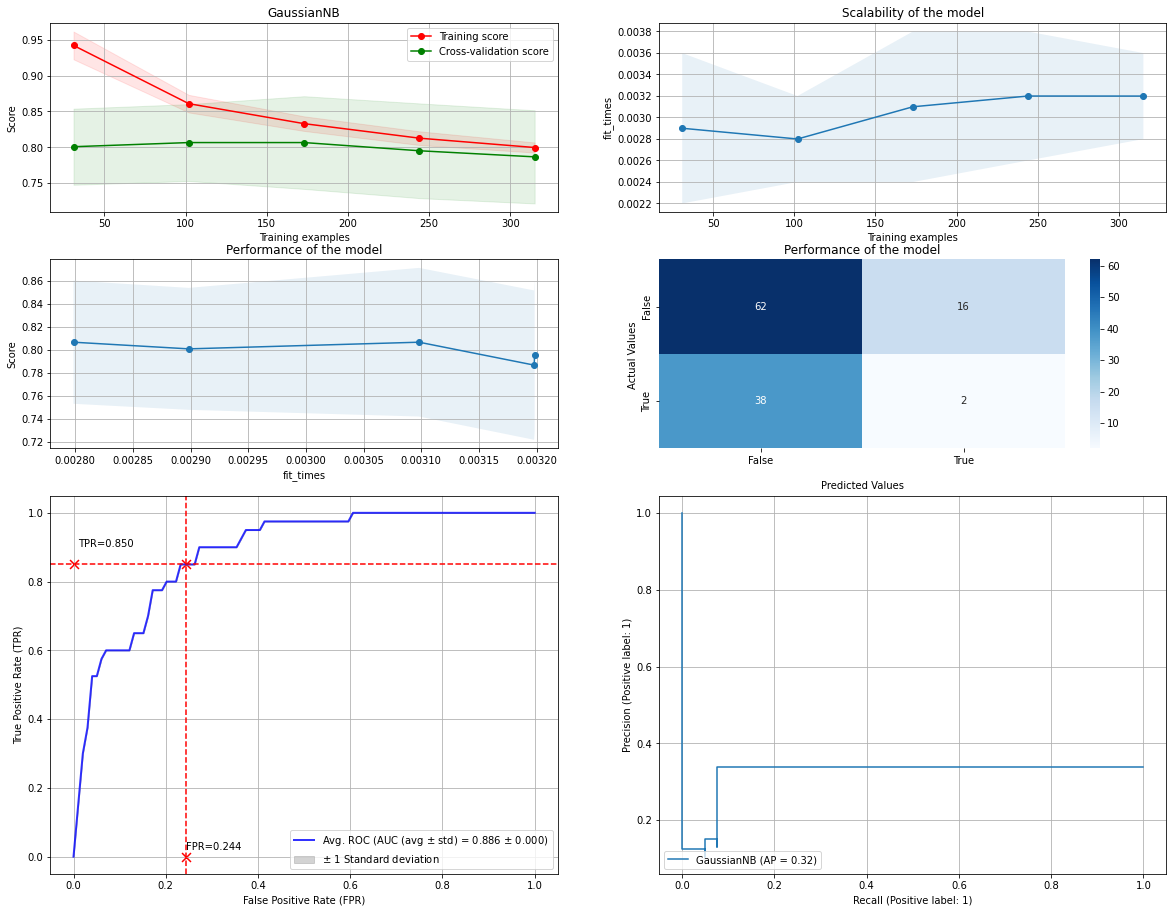

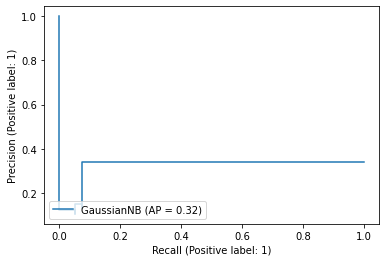

Detailed classification report for KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        78
           1       0.72      0.90      0.80        40

    accuracy                           0.85       118
   macro avg       0.83      0.86      0.84       118
weighted avg       0.87      0.85      0.85       118


Area Under ROC (AUC): 0.9354166666666666

the cohen kappa : 0.679154078549849

Confusion Matrix for current fold: 
[[64 14]
 [ 4 36]]

Accuracy: 0.847457627118644



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


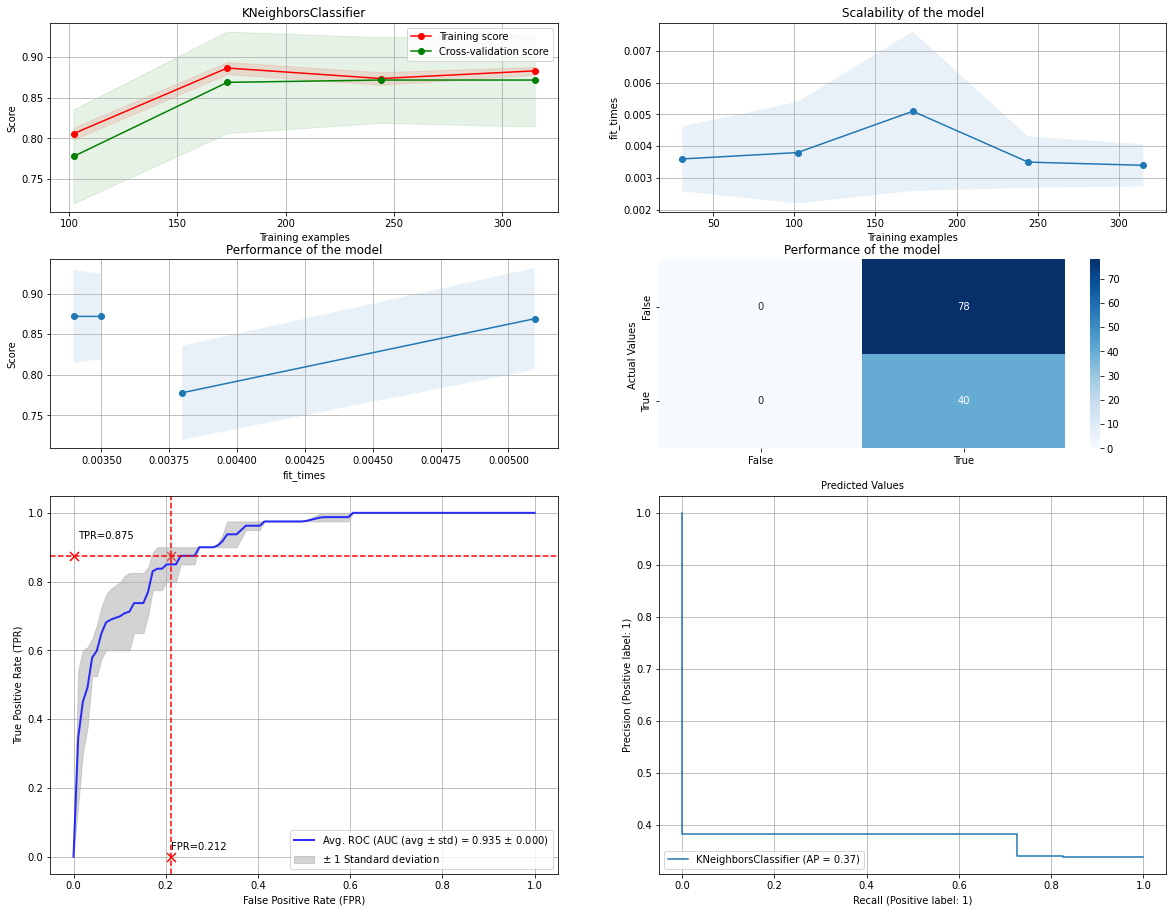

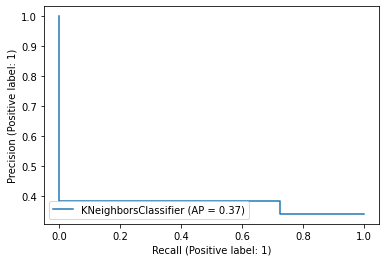

Detailed classification report for RandomForestClassifier

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        78
           1       0.80      0.88      0.83        40

    accuracy                           0.88       118
   macro avg       0.86      0.88      0.87       118
weighted avg       0.89      0.88      0.88       118


Area Under ROC (AUC): 0.9474358974358974

the cohen kappa : 0.7415519399249062

Confusion Matrix for current fold: 
[[69  9]
 [ 5 35]]

Accuracy: 0.8813559322033898



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


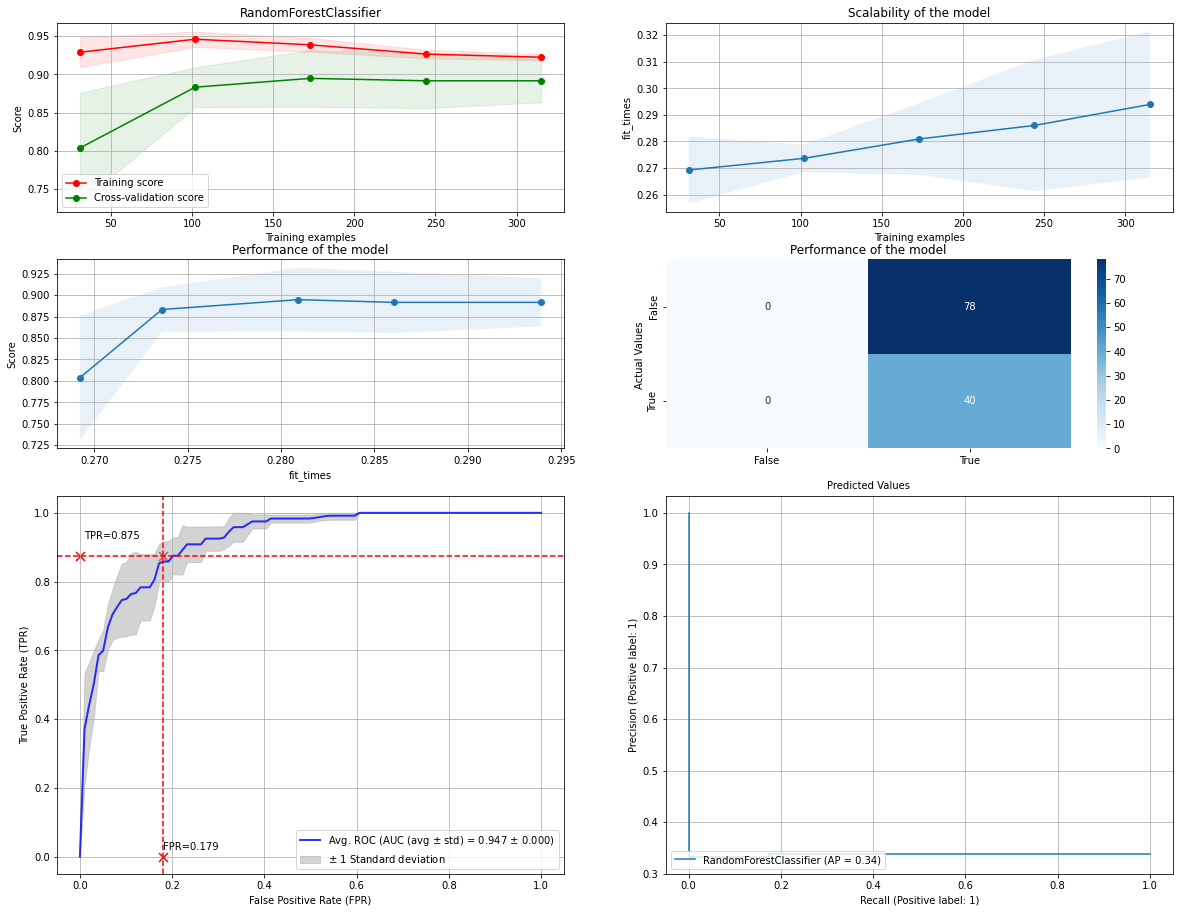

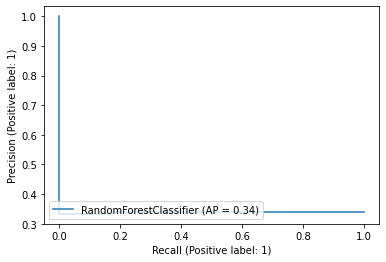

Detailed classification report for ExtraTreesClassifier

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        78
           1       0.80      0.90      0.85        40

    accuracy                           0.89       118
   macro avg       0.87      0.89      0.88       118
weighted avg       0.90      0.89      0.89       118


Area Under ROC (AUC): 0.9506410256410256

the cohen kappa : 0.7614307931570762

Confusion Matrix for current fold: 
[[69  9]
 [ 4 36]]

Accuracy: 0.8898305084745762



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


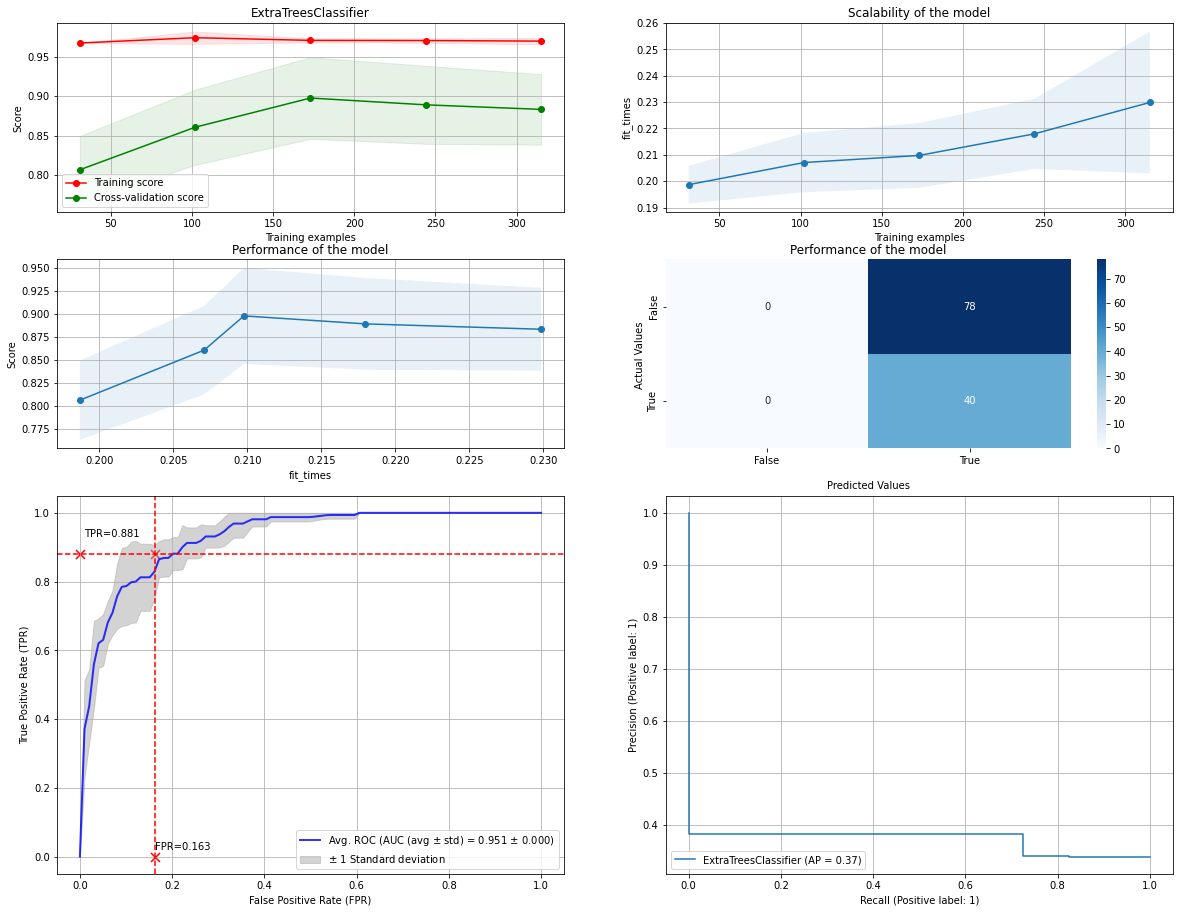

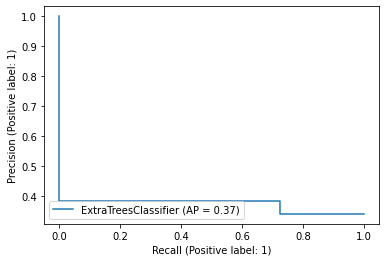

Detailed classification report for BaggingClassifier

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        78
           1       0.79      0.85      0.82        40

    accuracy                           0.87       118
   macro avg       0.86      0.87      0.86       118
weighted avg       0.88      0.87      0.87       118


Area Under ROC (AUC): 0.9248397435897437

the cohen kappa : 0.7214353163361662

Confusion Matrix for current fold: 
[[69  9]
 [ 6 34]]

Accuracy: 0.8728813559322034



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


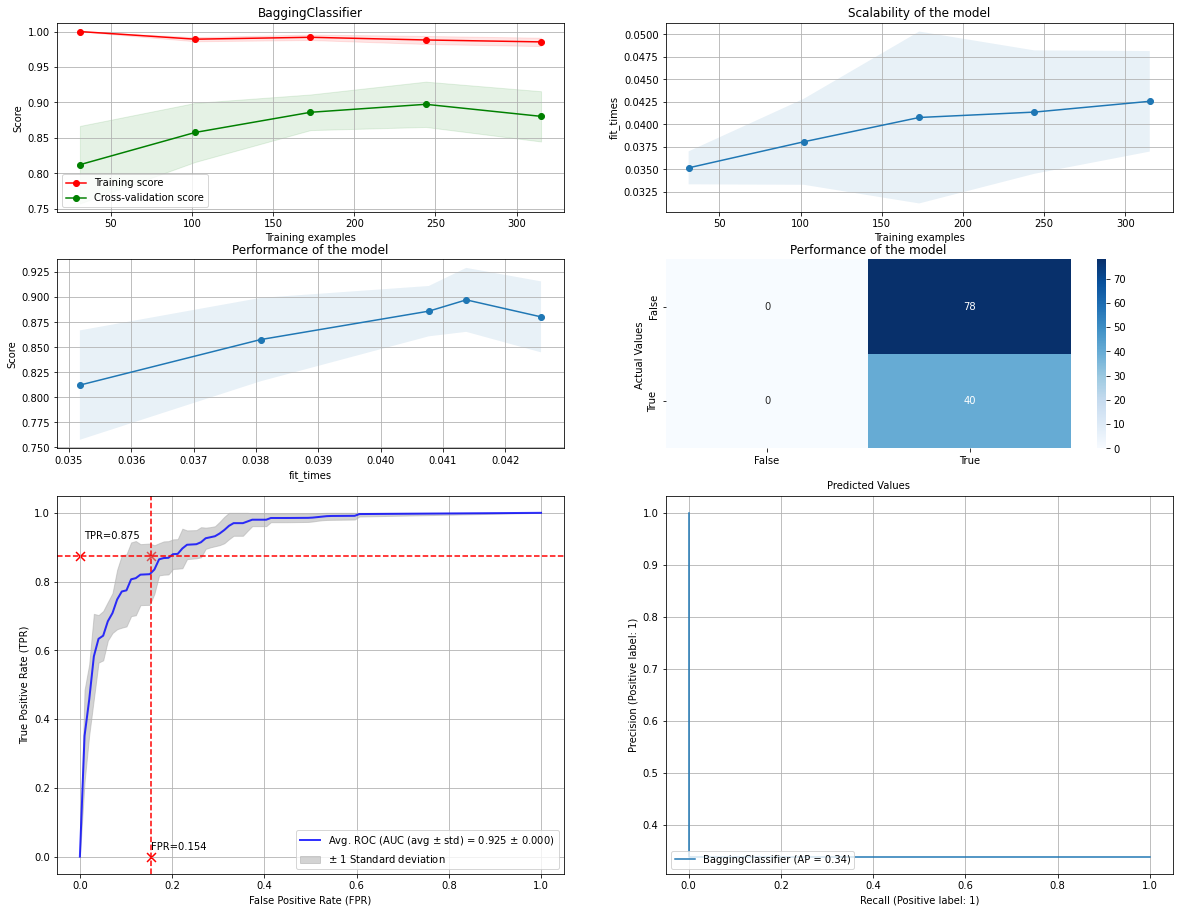

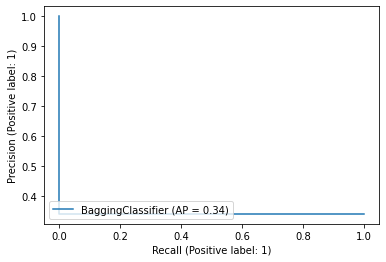

Detailed classification report for AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        78
           1       0.74      0.88      0.80        40

    accuracy                           0.86       118
   macro avg       0.84      0.86      0.85       118
weighted avg       0.87      0.86      0.86       118


Area Under ROC (AUC): 0.9451923076923077

the cohen kappa : 0.6916692284045496

Confusion Matrix for current fold: 
[[66 12]
 [ 5 35]]

Accuracy: 0.8559322033898306



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


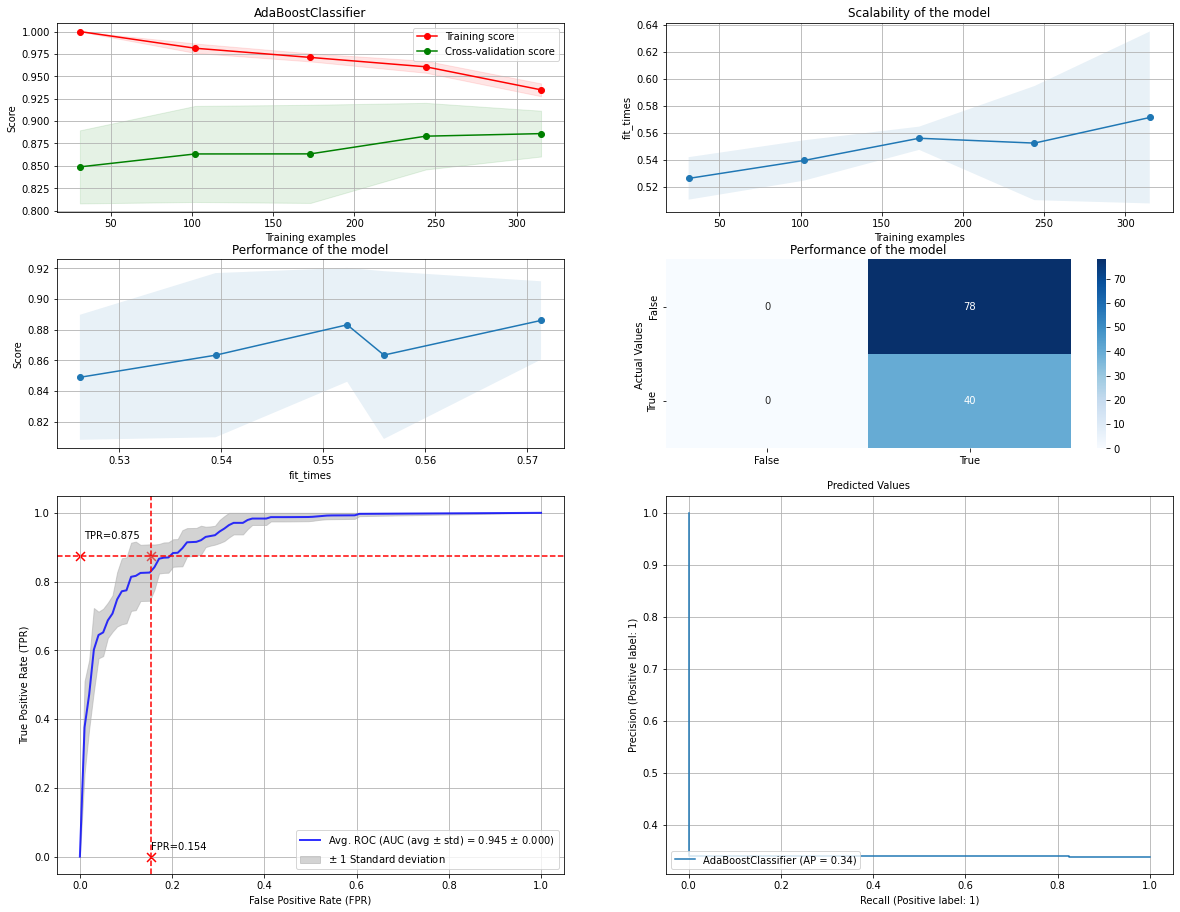

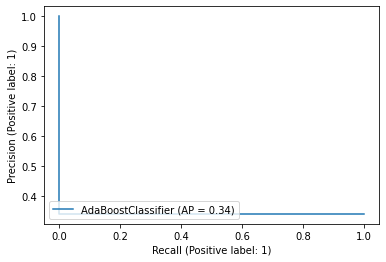

Detailed classification report for DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        78
           1       0.72      0.90      0.80        40

    accuracy                           0.85       118
   macro avg       0.83      0.86      0.84       118
weighted avg       0.87      0.85      0.85       118


Area Under ROC (AUC): 0.9163461538461539

the cohen kappa : 0.679154078549849

Confusion Matrix for current fold: 
[[64 14]
 [ 4 36]]

Accuracy: 0.847457627118644



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


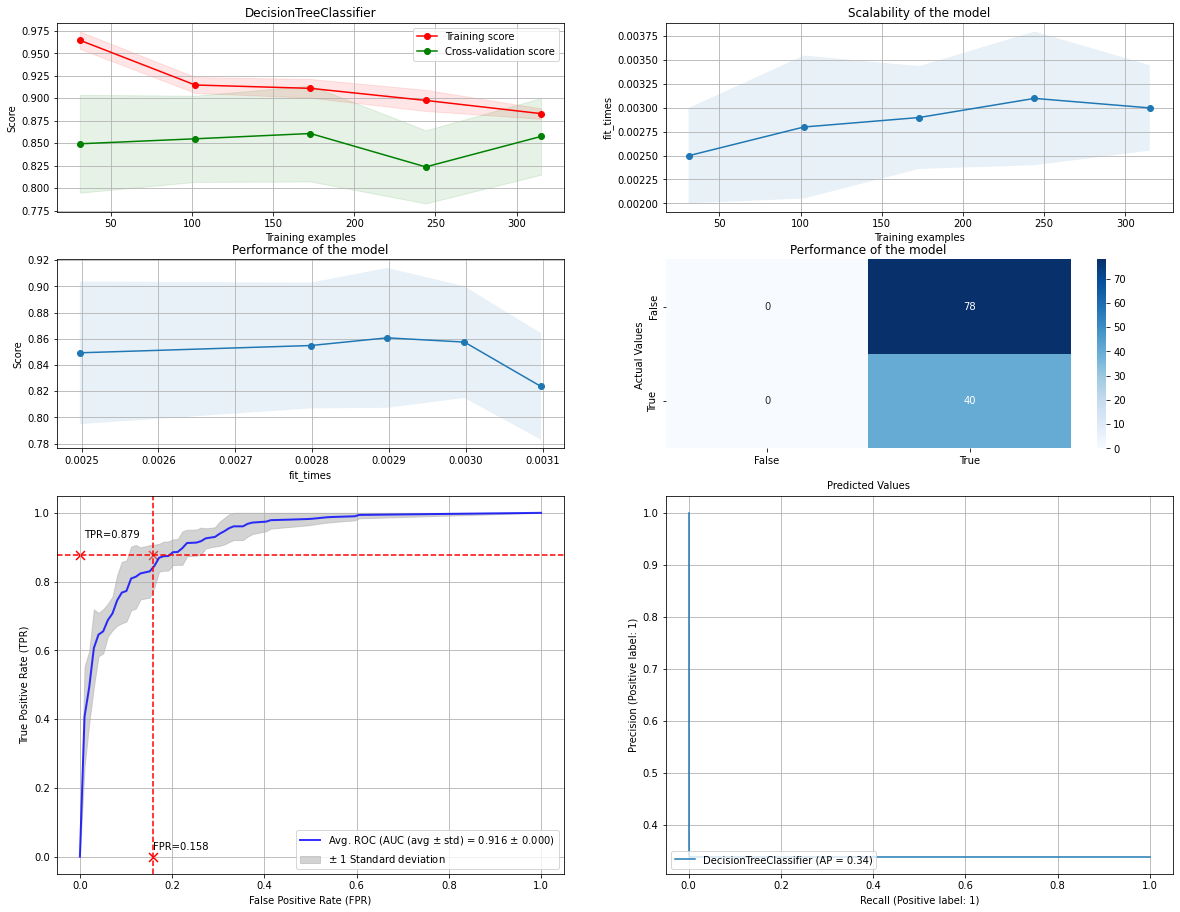

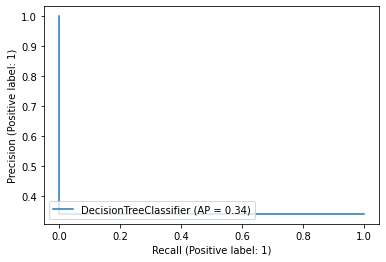

Detailed classification report for XGBClassifier

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.76      0.88      0.81        40

    accuracy                           0.86       118
   macro avg       0.85      0.87      0.85       118
weighted avg       0.87      0.86      0.87       118


Area Under ROC (AUC): 0.9391025641025641

the cohen kappa : 0.7081014223871367

Confusion Matrix for current fold: 
[[67 11]
 [ 5 35]]

Accuracy: 0.864406779661017



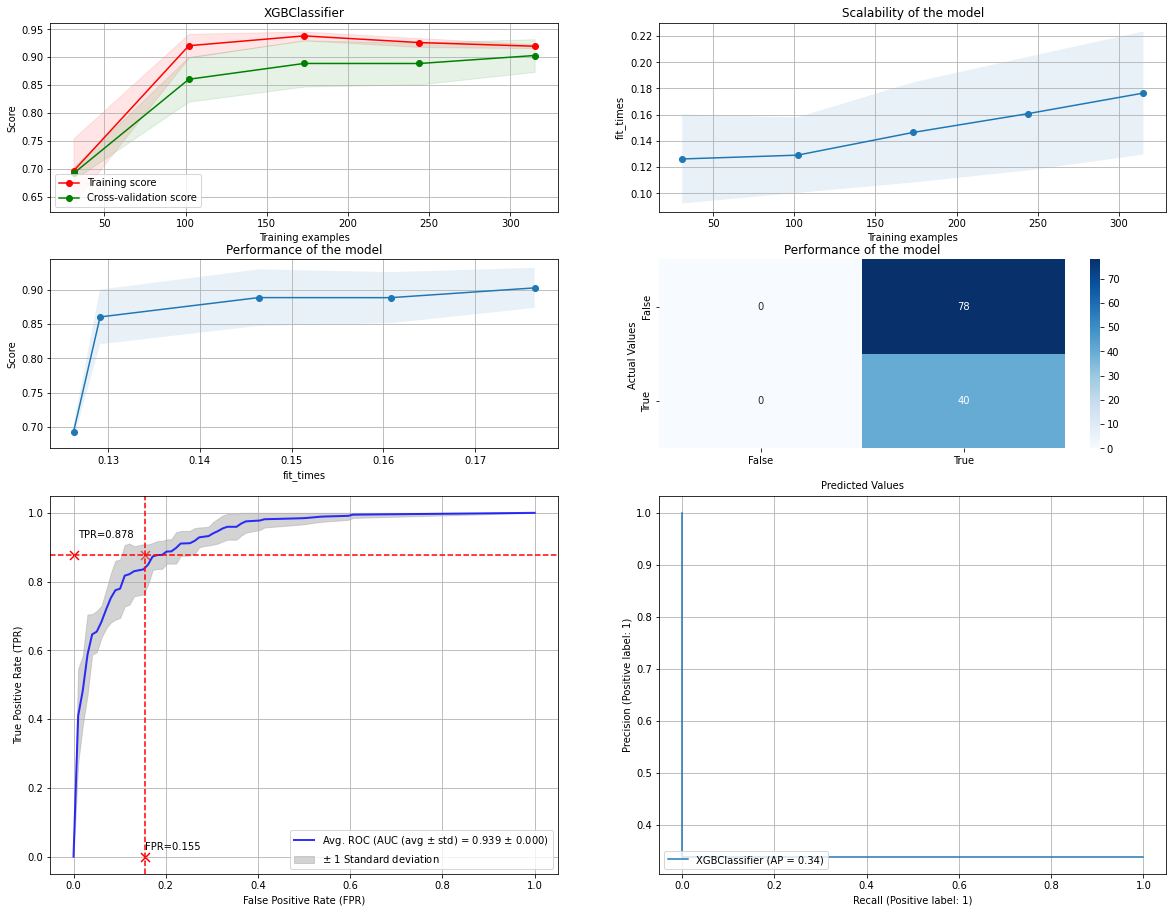

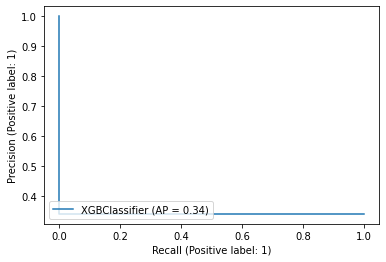

Detailed classification report for LogisticRegression

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        78
           1       0.68      0.90      0.77        40

    accuracy                           0.82       118
   macro avg       0.81      0.84      0.81       118
weighted avg       0.85      0.82      0.83       118


Area Under ROC (AUC): 0.8733974358974359

the cohen kappa : 0.632016632016632

Confusion Matrix for current fold: 
[[61 17]
 [ 4 36]]

Accuracy: 0.8220338983050848



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


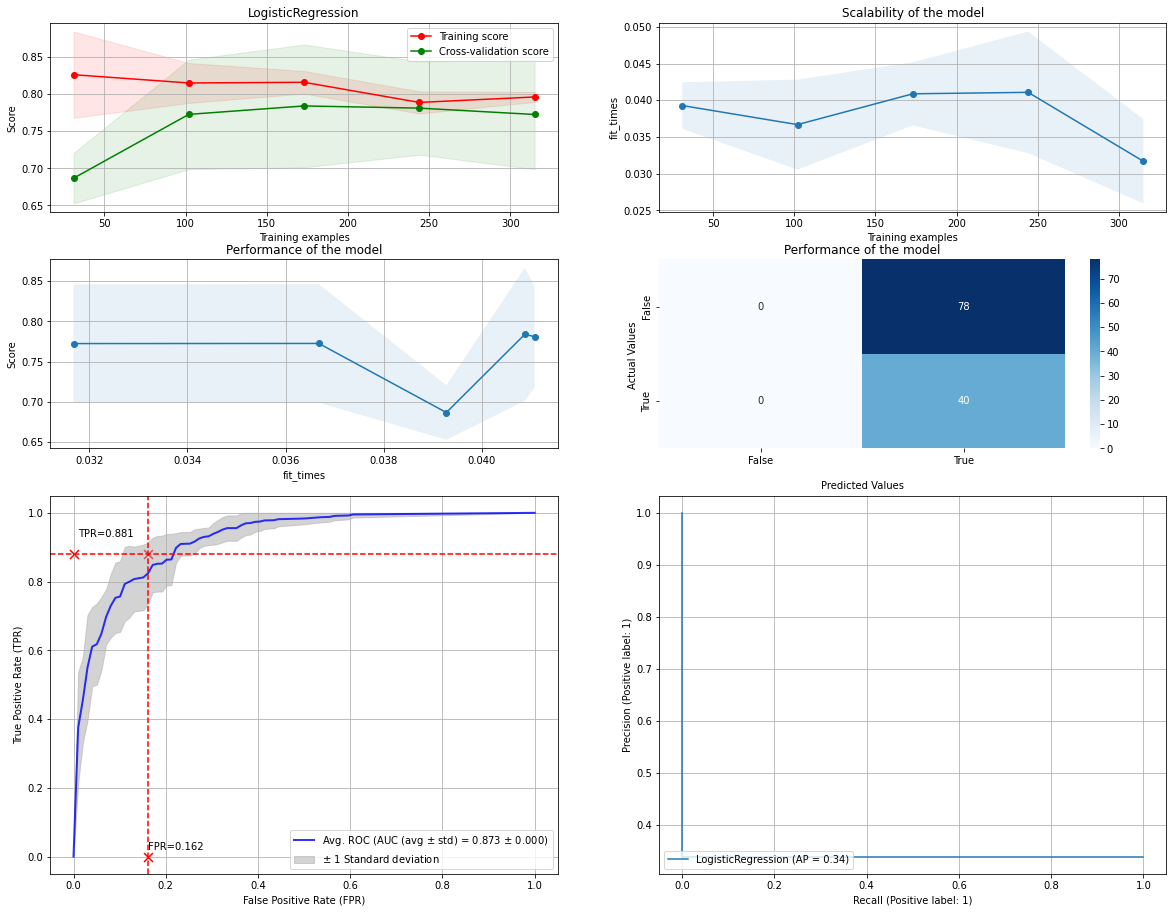

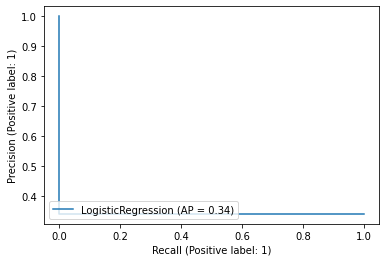

Detailed classification report for SVC

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.76      0.88      0.81        40

    accuracy                           0.86       118
   macro avg       0.85      0.87      0.85       118
weighted avg       0.87      0.86      0.87       118


Area Under ROC (AUC): 0.9163461538461538

the cohen kappa : 0.7081014223871367

Confusion Matrix for current fold: 
[[67 11]
 [ 5 35]]

Accuracy: 0.864406779661017



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


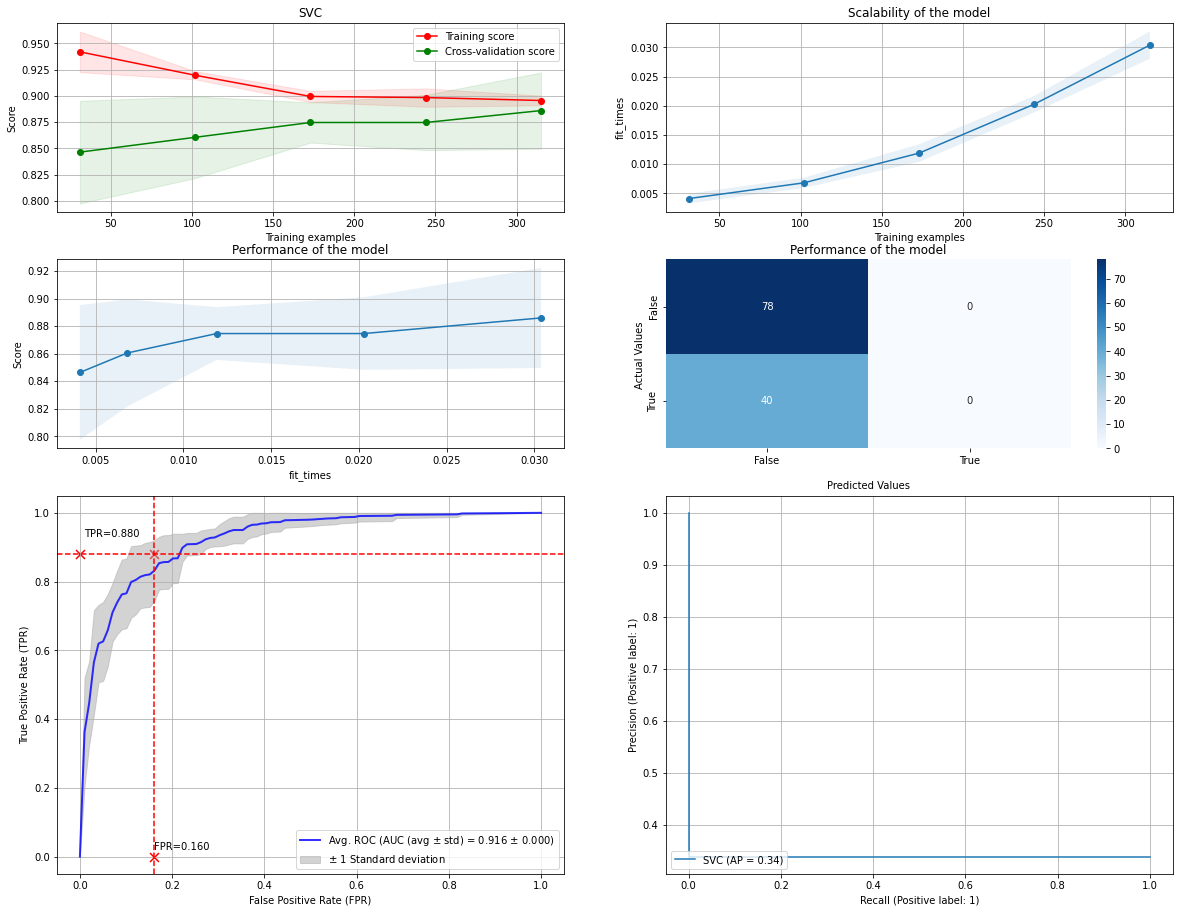

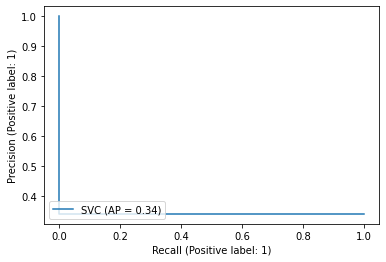

Detailed classification report for LinearDiscriminantAnalysis

              precision    recall  f1-score   support

           0       0.94      0.74      0.83        78
           1       0.64      0.90      0.75        40

    accuracy                           0.80       118
   macro avg       0.79      0.82      0.79       118
weighted avg       0.84      0.80      0.80       118


Area Under ROC (AUC): 0.873076923076923

the cohen kappa : 0.5864485981308412

Confusion Matrix for current fold: 
[[58 20]
 [ 4 36]]

Accuracy: 0.7966101694915254



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


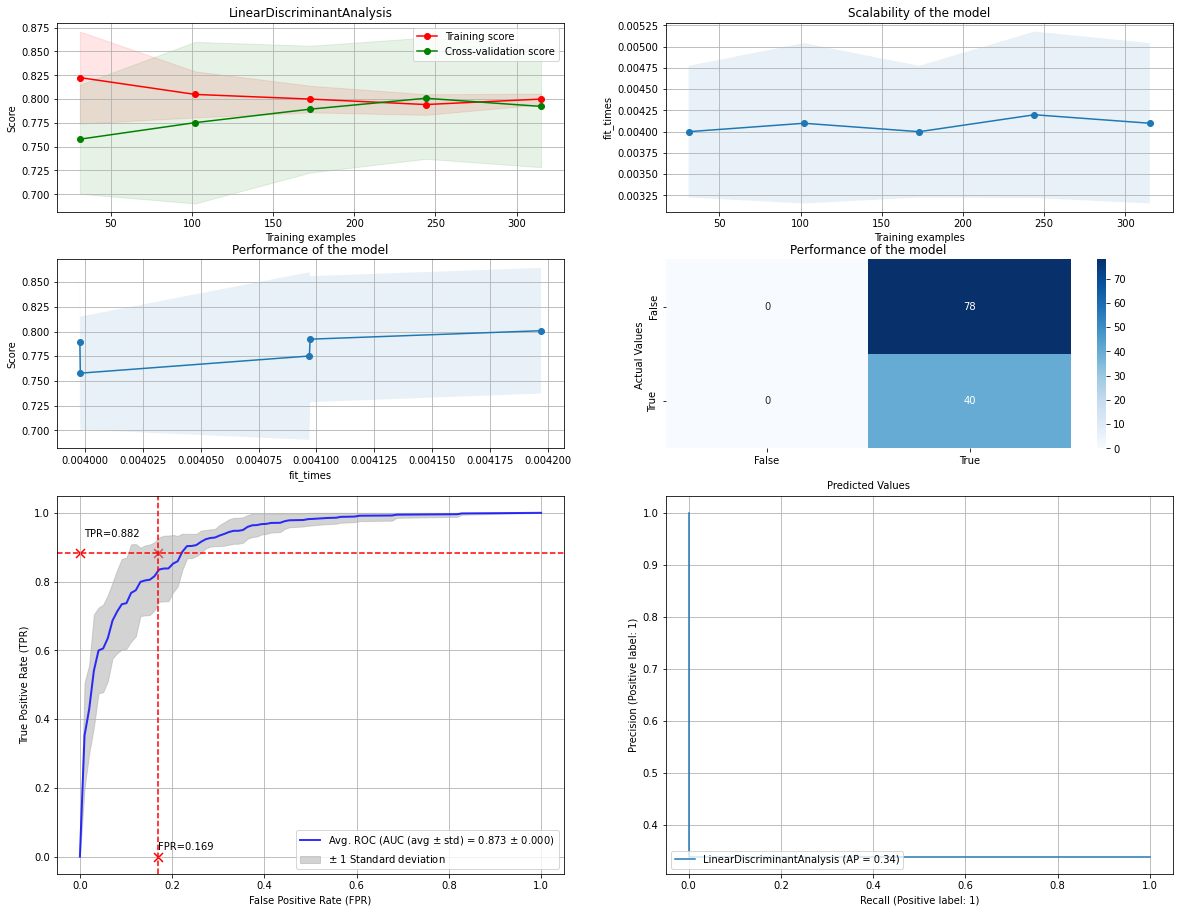

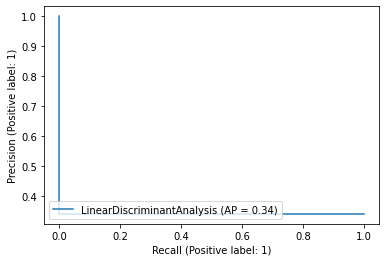

Detailed classification report for MLPClassifier

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        78
           1       0.73      0.93      0.81        40

    accuracy                           0.86       118
   macro avg       0.84      0.87      0.85       118
weighted avg       0.88      0.86      0.86       118


Area Under ROC (AUC): 0.8958333333333333

the cohen kappa : 0.6987083208170621

Confusion Matrix for current fold: 
[[64 14]
 [ 3 37]]

Accuracy: 0.8559322033898306



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


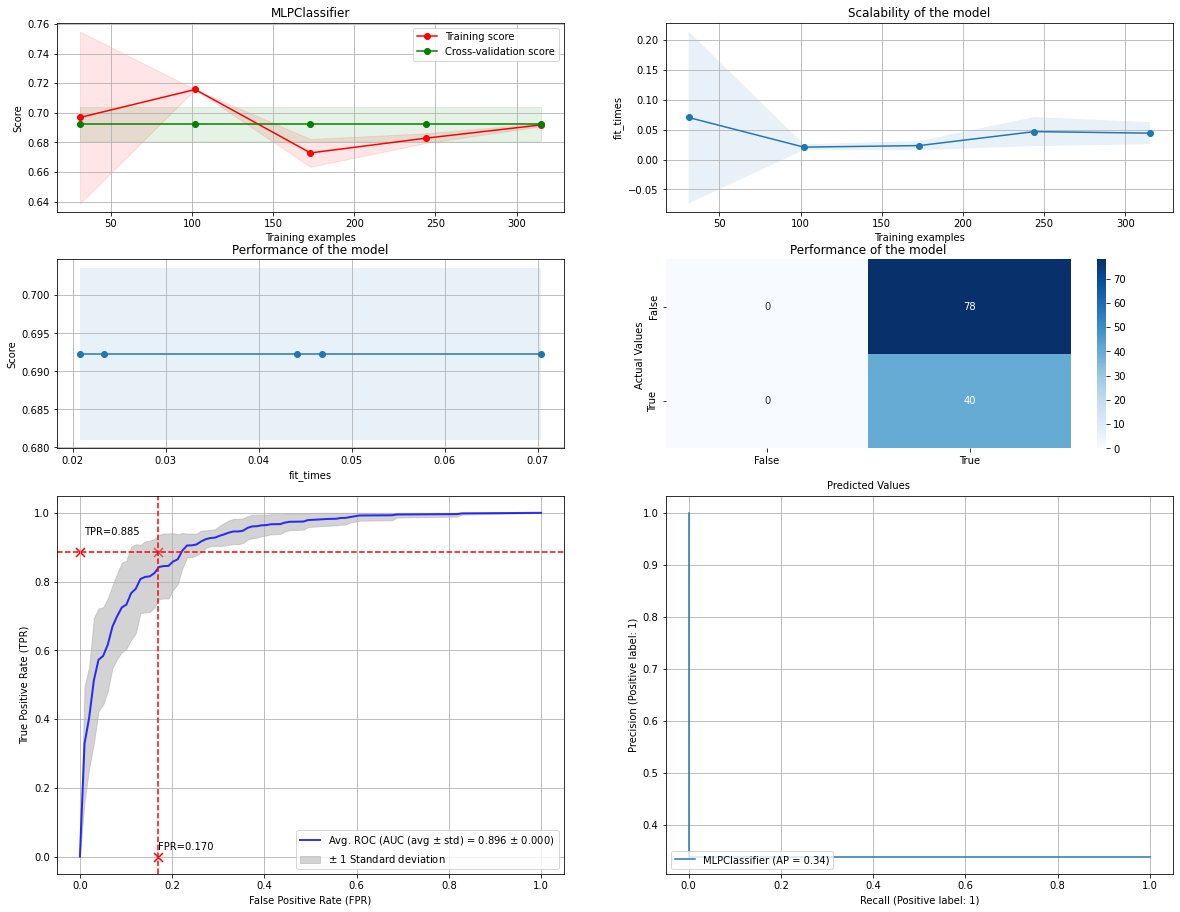

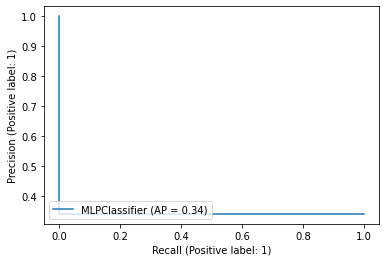

Detailed classification report for QuadraticDiscriminantAnalysis

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        78
           1       0.69      0.82      0.75        40

    accuracy                           0.81       118
   macro avg       0.79      0.82      0.80       118
weighted avg       0.83      0.81      0.82       118


Area Under ROC (AUC): 0.8942307692307693

the cohen kappa : 0.6033007334963325

Confusion Matrix for current fold: 
[[63 15]
 [ 7 33]]

Accuracy: 0.8135593220338984



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


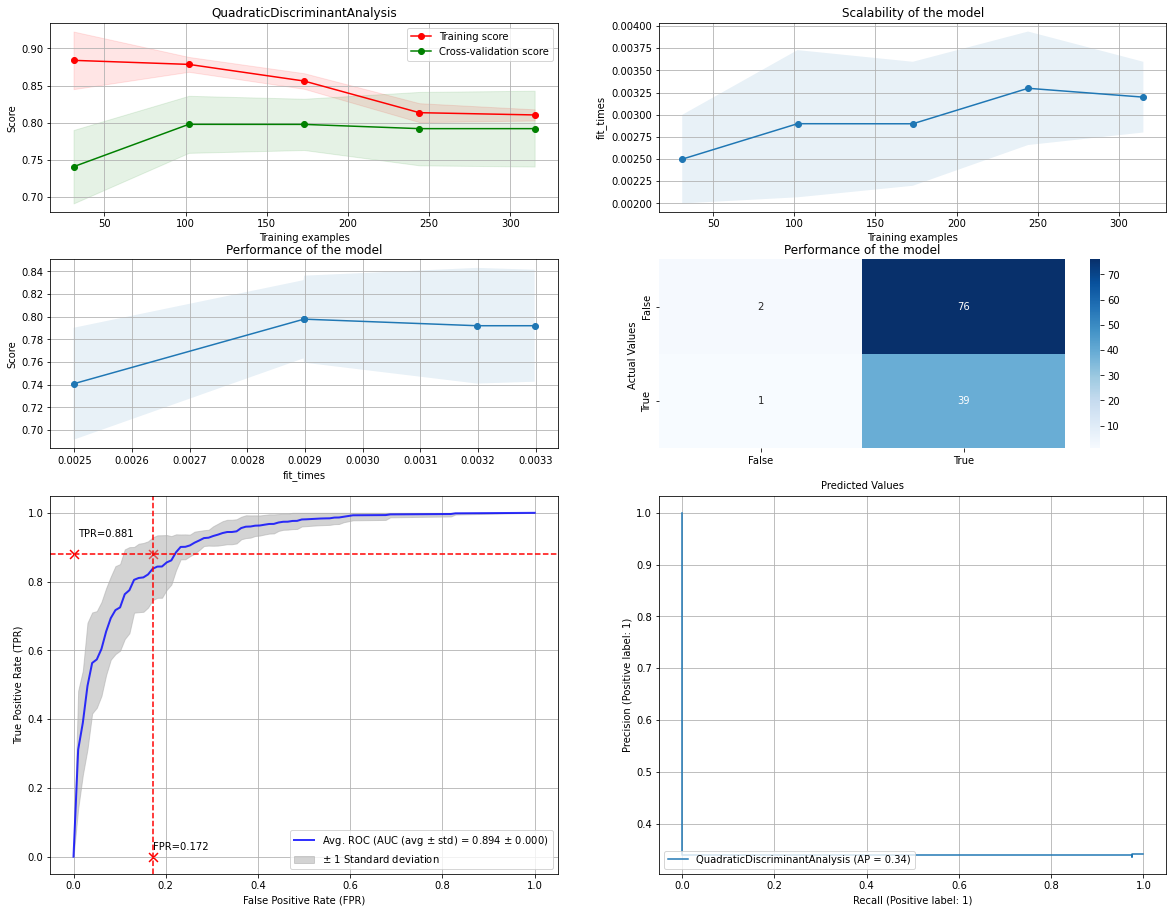

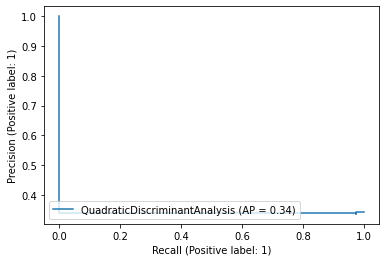

Detailed classification report for GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        78
           1       0.80      0.82      0.81        40

    accuracy                           0.87       118
   macro avg       0.86      0.86      0.86       118
weighted avg       0.87      0.87      0.87       118


Area Under ROC (AUC): 0.9358974358974359

the cohen kappa : 0.7180630774131889

Confusion Matrix for current fold: 
[[70  8]
 [ 7 33]]

Accuracy: 0.8728813559322034



C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\VirWus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


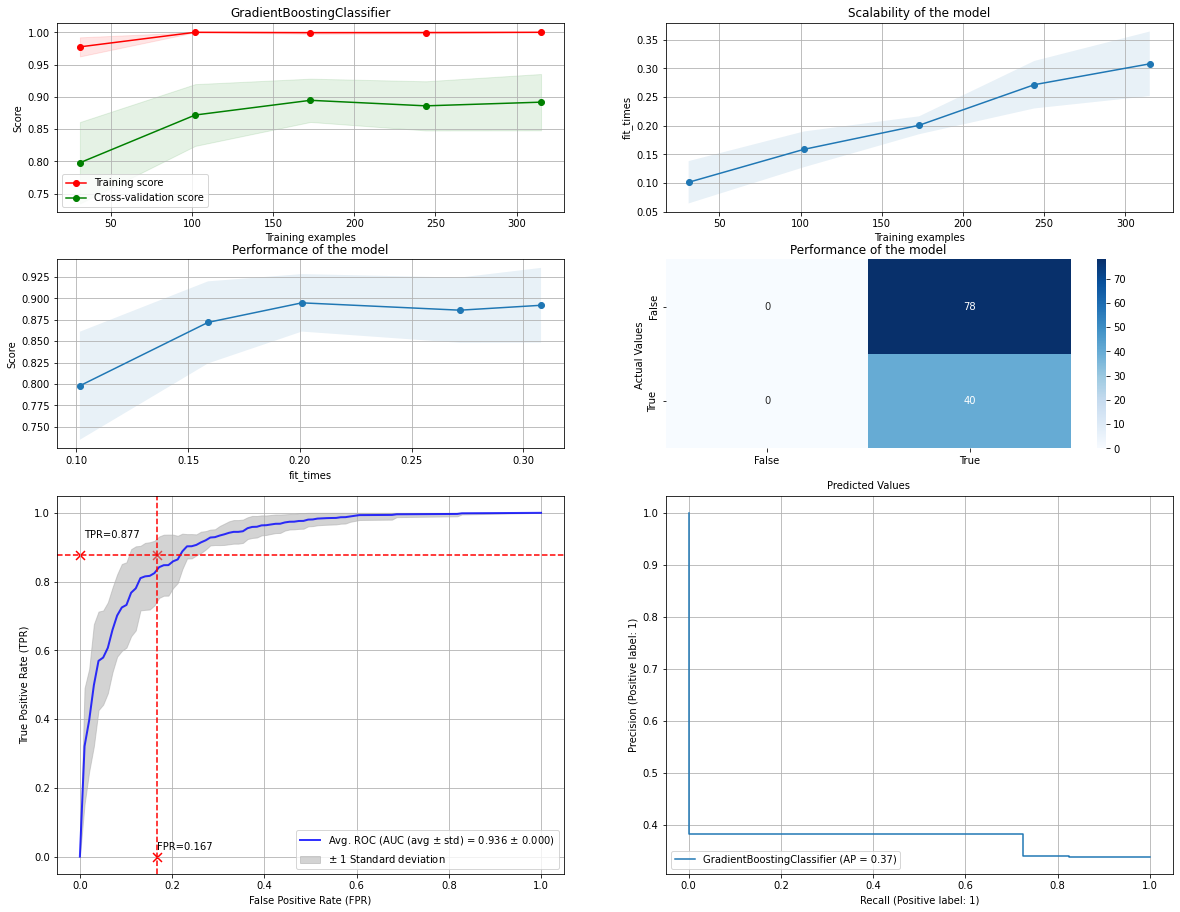

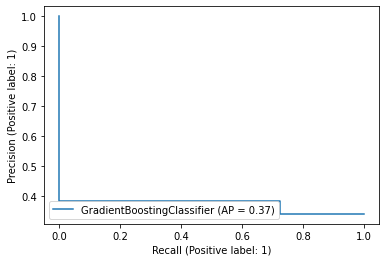

In [485]:
TOP_FEATURES = len(All)-len(Accepted)
for model in models:

    #fig = plt.figure(figsize=(10, 7))

    model_name = type(model).__name__
    #print(model_name)
   
    pipeline = make_pipeline(
        rs_X,
        #fs,
        smt,
        model
    )

    # pipeline = Pipeline(
    #     steps=[
    #     ("scaler", rs_X),
    #     ("MI", fs),
    #     #("DR", pca),
    #     (model_name, model)
    #     ]
    #     )

    pipeline.fit(npX, npy)

    score = cross_validate(pipeline, npX, npy, scoring=(
        'accuracy',
        'f1',
        'roc_auc',
        'precision',
        'recall',
        'neg_log_loss',
        'neg_mean_squared_error'
    ), cv=cv, n_jobs=-1)
    
    tn, fp, fn, tp, roc_auc, fpr, tpr = metrics(model_name,
                                                y_true=y_test,  # get the values of  model evaluation
                                                y_pred=pipeline.predict(
                                                    X_test),
                                                probas_=pipeline.predict_proba(
                                                    X_test)
                                                )

    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)

    fig = plt.figure(1, figsize=(20, 20))

    gs = gridspec.GridSpec(nrows=4, ncols=2, height_ratios=[1, 1, 2,1])

    plot_learning_curve(fig,gs,pipeline[len(pipeline)-1], model_name, npX, npy, cv=10, n_jobs=-1, mean_fpr=mean_fpr , tprs=tprs, aucs=roc_auc, TP=TP, TN=TN, FP=FP, FN=FN)

    plt.show()
   
    topF = TopF(pipeline[len(pipeline)-1], TOP_FEATURES=TOP_FEATURES,X_train=X_train)

    # print(score)

    data = ["{:.3f}+-{:.2f}".format(score['test_accuracy'].mean(),
                                    score['test_accuracy'].std()),
            "{:.3f}+-{:.2f}".format(score['test_f1'].mean(),
                                    score['test_f1'].std()),
            "{:.3f}+-{:.2f}".format(score['test_roc_auc'].mean(),
                                    score['test_roc_auc'].std()),
            "{:.3f}+-{:.2f}".format(score['test_precision'].mean(),
                                    score['test_precision'].std()),
            "{:.3f}+-{:.2f}".format(score['test_recall'].mean(),
                                    score['test_recall'].std()),
            "{:.3f}+-{:.2f}".format(score['fit_time'].mean(),
                                    score['fit_time'].std()),
            "{:.3f}+-{:.2f}".format(score['score_time'].mean(),
                                    score['score_time'].std()),
            format(cohen_kappa_score(y_test, pipeline.predict(X_test)), ".3f"),
            format(mean_squared_error(y_test, pipeline.predict(X_test)), ".3f"),
            topF]

    scores.append(data)


# **Stacking**


In [486]:
estimators =  [
                        ('rf_1', clf_rf),
                        ('knn_1', clf_knn),
                        ('gb', clf_Gb),
                        ('Xb', clf_xg),
                        ('ada', clf_ab),
                        ('GPC', clf_GPC),
                        ('SVC', clf_svm)      
                       ]
stack_model = StackingClassifier( estimators = estimators ,final_estimator = clf_lr)

pipeline = make_pipeline(
        rs_X,
        #fs,
        #smt,
        stack_model
        )

pipeline.fit(npX, npy)

tn, fp, fn, tp, roc_auc, fpr, tpr = metrics("Stacked",
                                                y_true=y_test,  # get the values of  model evaluation
                                                y_pred=pipeline.predict(X_test),
                                                probas_=pipeline.predict_proba(X_test)
                                                )

score = cross_validate(pipeline, npX, npy, scoring=(
        'accuracy',
        'f1',
        'roc_auc',
        'precision',
        'recall',
        'neg_log_loss',
        'neg_mean_squared_error'
    ), cv=cv, n_jobs=-1)

topF = TopF(pipeline[len(pipeline)-1],TOP_FEATURES=TOP_FEATURES)

data = ["{:.3f}+-{:.2f}".format(score['test_accuracy'].mean(),score['test_accuracy'].std()),
            "{:.3f}+-{:.2f}".format(score['test_f1'].mean(),score['test_f1'].std()),
            "{:.3f}+-{:.2f}".format(score['test_roc_auc'].mean(),score['test_roc_auc'].std()),
            "{:.3f}+-{:.2f}".format(score['test_precision'].mean(),score['test_precision'].std()),
            "{:.3f}+-{:.2f}".format(score['test_recall'].mean(),score['test_recall'].std()), 
            "{:.3f}+-{:.2f}".format(score['fit_time'].mean(),score['fit_time'].std()),
            "{:.3f}+-{:.2f}".format(score['score_time'].mean(),score['score_time'].std()),
            format(cohen_kappa_score(y_test, pipeline.predict(X_test)), ".3f"),
            format(mean_squared_error(y_test, pipeline.predict(X_test)), ".3f"),
            topF]

scores.append(data)

Detailed classification report for Stacked

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.83      0.85      0.84        40

    accuracy                           0.89       118
   macro avg       0.88      0.88      0.88       118
weighted avg       0.89      0.89      0.89       118


Area Under ROC (AUC): 0.9423076923076923

the cohen kappa : 0.7556546670914304

Confusion Matrix for current fold: 
[[71  7]
 [ 6 34]]

Accuracy: 0.8898305084745762



# **ANN Model**


clf_ANN.fit(npX,npy,epochs=100)

#Evaluate the model on the test data using evaluate
print("Evaluate on test data")
results = clf_ANN.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)


# **Show Results**

In [487]:
mode = pd.DataFrame(scores, index=Classifiers, columns=['Accuracy',
                                                        'F1 score',
                                                        'Roc_Auc',
                                                        'Precision',
                                                        'Recall',
                                                        'Fit time',
                                                        'Score Time',
                                                        'CK',
                                                        'RMSE',
                                                        'Top']).sort_values(by='Roc_Auc', ascending=False)
mode.explode('Top')

,Accuracy,F1 score,Roc_Auc,Precision,Recall,Fit time,Score Time,CK,RMSE,Top
GBC,0.891+-0.03,0.821+-0.04,0.938+-0.02,0.833+-0.06,0.814+-0.06,0.335+-0.04,0.023+-0.01,0.718,0.127,"[F5, 0.6127928875192141]"
GBC,0.891+-0.03,0.821+-0.04,0.938+-0.02,0.833+-0.06,0.814+-0.06,0.335+-0.04,0.023+-0.01,0.718,0.127,"[F4, 0.11268972306192461]"
GBC,0.891+-0.03,0.821+-0.04,0.938+-0.02,0.833+-0.06,0.814+-0.06,0.335+-0.04,0.023+-0.01,0.718,0.127,"[F8, 0.09154033013345542]"
GBC,0.891+-0.03,0.821+-0.04,0.938+-0.02,0.833+-0.06,0.814+-0.06,0.335+-0.04,0.023+-0.01,0.718,0.127,"[F2, 0.07410263384212405]"
GBC,0.891+-0.03,0.821+-0.04,0.938+-0.02,0.833+-0.06,0.814+-0.06,0.335+-0.04,0.023+-0.01,0.718,0.127,"[F6, 0.07029628988143756]"
XGB,0.875+-0.03,0.803+-0.05,0.934+-0.03,0.787+-0.07,0.826+-0.08,0.215+-0.02,0.028+-0.01,0.708,0.136,"[F5, 0.5792317]"
XGB,0.875+-0.03,0.803+-0.05,0.934+-0.03,0.787+-0.07,0.826+-0.08,0.215+-0.02,0.028+-0.01,0.708,0.136,"[F8, 0.15501206]"
XGB,0.875+-0.03,0.803+-0.05,0.934+-0.03,0.787+-0.07,0.826+-0.08,0.215+-0.02,0.028+-0.01,0.708,0.136,"[F4, 0.080954716]"
XGB,0.875+-0.03,0.803+-0.05,0.934+-0.03,0.787+-0.07,0.826+-0.08,0.215+-0.02,0.028+-0.01,0.708,0.136,"[F6, 0.06504805]"
XGB,0.875+-0.03,0.803+-0.05,0.934+-0.03,0.787+-0.07,0.826+-0.08,0.215+-0.02,0.028+-0.01,0.708,0.136,"[F2, 0.064647764]"
